# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Load the Data

In [6]:
train_data=pd.read_csv(r"C:\Users\abhij\Desktop\Fashion mnist\fashion-mnist_test.csv")
test_data=pd.read_csv(r"C:\Users\abhij\Desktop\Fashion mnist\fashion-mnist_train.csv")

x_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values

x_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (10000, 784), y_train shape: (10000,)
x_test shape: (60000, 784), y_test shape: (60000,)


In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Visualizatio of Sample Images

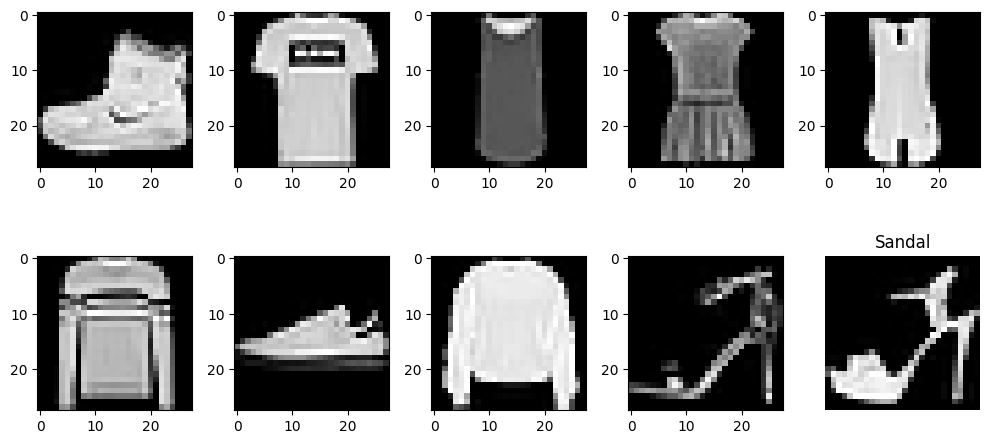

In [22]:
#Plot sample images with lables
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.title(class_names[y_train[i]])
plt.axis('off')
plt.tight_layout()
plt.show()

# Data Processing

In [24]:
#Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

#Ont-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [25]:
print(y_train_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
print(y_test_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Build the Neural Network

In [32]:
model = Sequential([
    Input(shape=(28, 28)), 
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [34]:
history = model.fit(x_train, y_train_encoded, 
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7718 - loss: 0.6534 - val_accuracy: 0.8594 - val_loss: 0.4006
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8587 - loss: 0.3896 - val_accuracy: 0.8638 - val_loss: 0.3720
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8755 - loss: 0.3394 - val_accuracy: 0.8609 - val_loss: 0.3742
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8841 - loss: 0.3148 - val_accuracy: 0.8750 - val_loss: 0.3456
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8919 - loss: 0.2947 - val_accuracy: 0.8773 - val_loss: 0.3432
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8931 - loss: 0.2819 - val_accuracy: 0.8840 - val_loss: 0.3279
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8975 - loss: 0.2678 - val_accuracy: 0.8797 - val_loss: 0.3413
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9047 - loss: 0.2531 -

# Evaluate the Model

In [37]:
#Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.35348090529441833
Test Accuracy: 0.8817999958992004


In [38]:
#Improving Model Architecture
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [39]:
#Adjusr Hyperparameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
#Monitor Training
early_stopping = EarlyStopping(monitor = 'val_loss', patience=5,
restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50,
          callbacks=[early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.7297 - loss: 0.7462 - val_accuracy: 0.8596 - val_loss: 0.3871
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8593 - loss: 0.3957 - val_accuracy: 0.8845 - val_loss: 0.3181
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8807 - loss: 0.3288 - val_accuracy: 0.8943 - val_loss: 0.2928
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8907 - loss: 0.2974 - val_accuracy: 0.8911 - val_loss: 0.2964
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9002 - loss: 0.2762 - val_accuracy: 0.8994 - val_loss: 0.2699
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9042 - loss: 0.2621 - val_accuracy: 0.9028 - val_loss: 0.2677
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9111 - loss: 0.2388 - val_accuracy: 0.9014 - val_loss: 0.2631
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9157 -

In [41]:
 print(x_train.shape)

(60000, 28, 28)


In [42]:
if len(x_train.shape) == 3:
    x_train = np.expand_dims(x_train, axis =-1)

In [43]:
x_train=x_train.astype('float32') / 255.0

In [44]:
 #Verify Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                             height_shift_range=0.1)
datagen.fit(x_train)

In [45]:
#Train and Evaluate
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9137 - loss: 0.2519
Test Loss: 0.24975378811359406
Test Accuracy: 0.9114999771118164


# Verify Dataset

In [47]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.min(), x_train.max()) 

0.0 1.5378702e-05


In [48]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28)


In [49]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [50]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9


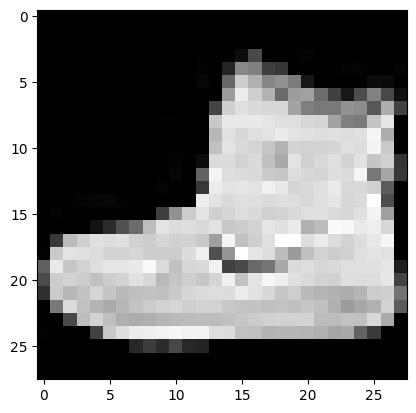

In [53]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
print(y_train[0])

In [54]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
import numpy as np

x_dummy = np.random.random((100, 28, 28, 1))
y_dummy = np.random.randint(0, 10, 100)

model.fit(x_dummy, y_dummy, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.0955 - loss: 2.3373
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1055 - loss: 2.2869
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0992 - loss: 2.2934
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0992 - loss: 2.2927 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0982 - loss: 2.2807


In [56]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.1017 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.1004 -

In [57]:
predictions = model.predict(x_test)
print(predictions[:5])  # Check if predictions make sense

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[0.10175706 0.09776612 0.10016367 0.09887801 0.10051155 0.10052741
  0.09903692 0.09995695 0.10072963 0.10067269]
 [0.10175706 0.09776612 0.10016367 0.09887801 0.10051155 0.10052741
  0.09903692 0.09995695 0.10072963 0.10067269]
 [0.10175706 0.09776612 0.10016367 0.09887801 0.10051155 0.10052741
  0.09903692 0.09995695 0.10072963 0.10067269]
 [0.10175706 0.09776612 0.10016367 0.09887801 0.10051155 0.10052741
  0.09903692 0.09995695 0.10072963 0.10067269]
 [0.10175706 0.09776612 0.10016367 0.09887801 0.10051155 0.10052741
  0.09903692 0.09995695 0.10072963 0.10067269]]


In [58]:
from tensorflow.keras.backend import clear_session

clear_session() 

In [59]:
#Train and Evaluate
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1001 - loss: 2.3026
Test Loss: 2.302645206451416
Test Accuracy: 0.10000000149011612


# Data Visualization (Training Metrics)

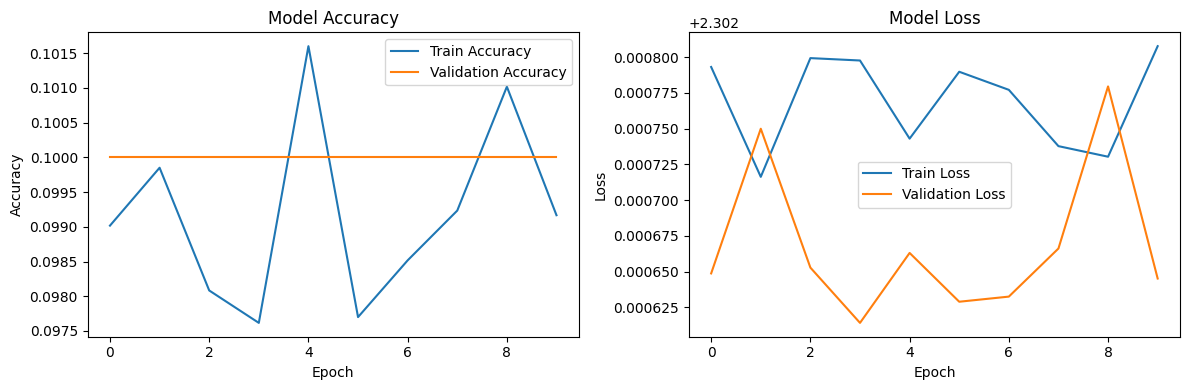

In [61]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


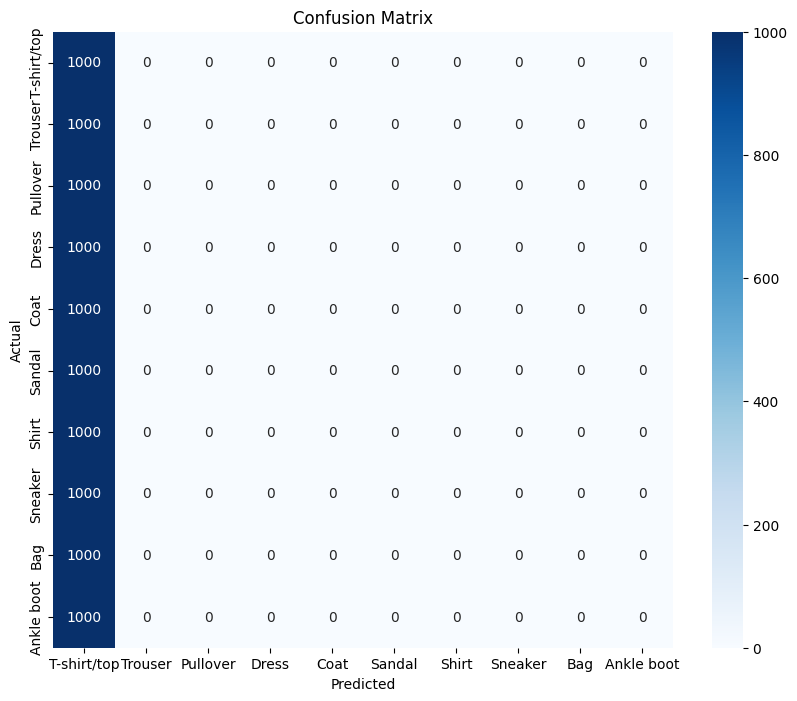

In [62]:
# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       1.00      0.00      0.00      1000
           2       1.00      0.00      0.00      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000
           5       1.00      0.00      0.00      1000
           6       1.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       1.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.91      0.10      0.02     10000
weighted avg       0.91      0.10      0.02     10000



# Save and Load the Model

In [121]:
#save the model
model.save('fashion_mnist_model.keras')

#Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('fashion_mnist_model.keras')

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Test PRediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


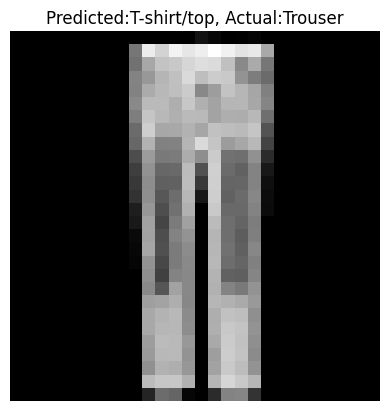

In [123]:
index = 15 #change to test diff samples
sample = x_test[index].reshape(1, 28, 28)
predicted_label = class_names[np.argmax(loaded_model.predict(sample))]
actual_label = class_names[y_test[index]]
class_names[y_test[index]]

plt.imshow(x_test[index],
           cmap='gray')
plt.title(f'Predicted:{predicted_label}, Actual:{actual_label}')
plt.axis('off')
plt.show()